#Import thư viện

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report
import nltk
import numpy as np
import matplotlib.pyplot as plt

#Đọc dữ liệu từ file exel

In [8]:
import os
os.chdir('/content')
!git clone https://github.com/NguyenXuanVinh2000/NLP-Classifcation

fatal: destination path 'NLP-Classifcation' already exists and is not an empty directory.


In [9]:
xl1 = pd.ExcelFile('/content/NLP-Classifcation/UIT-VSMEC/train_nor_811.xlsx')
df_train = pd.read_excel(xl1, 0)
xl2 = pd.ExcelFile('/content/NLP-Classifcation/UIT-VSMEC/test_nor_811.xlsx')
df_test = pd.read_excel(xl2, 0 )
xl3 = pd.ExcelFile('/content/NLP-Classifcation/UIT-VSMEC/valid_nor_811.xlsx')
df_tval = pd.read_excel(xl2, 0 )

#Phân chia biến độc lập X và biến phụ thuộc y

In [10]:
X_train = df_train["Sentence"]
X_val = df_train["Sentence"]
X_test = df_test["Sentence"]
y_train = df_train["Emotion"]
y_val = df_test["Emotion"]
y_test = df_test["Emotion"]


#Phân bố các nhãn của bình luận

Text(0, 0.5, 'so luong')

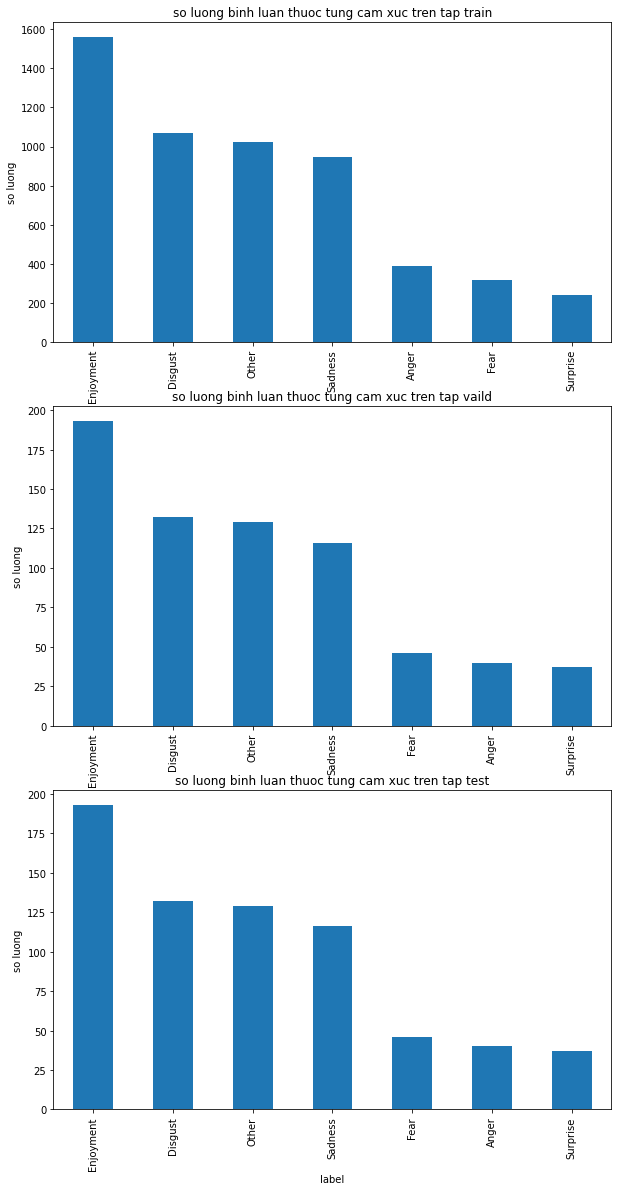

In [11]:
plt.figure(figsize=(10,20))
plt.subplot(311)
y_train.value_counts().plot(kind='bar')
plt.title('so luong binh luan thuoc tung cam xuc tren tap train')
plt.xlabel('label')
plt.ylabel('so luong')

plt.subplot(312)
y_val.value_counts().plot(kind='bar')
plt.title('so luong binh luan thuoc tung cam xuc tren tap vaild')
plt.xlabel('label')
plt.ylabel('so luong')

plt.subplot(313)
y_test.value_counts().plot(kind='bar')
plt.title('so luong binh luan thuoc tung cam xuc tren tap test')
plt.xlabel('label')
plt.ylabel('so luong')

#Đánh số cho các nhãn có dạng “không ở dạng số”

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

#Huấn luyện model Naive Bayes

In [13]:
my_tags =['0','1','2','3','4','5','6']
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
model = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
model.fit(X_train,y_train)
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.4531024531024531
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.47      0.56      0.51       132
           2       0.41      0.86      0.56       193
           3       0.00      0.00      0.00        46
           4       0.49      0.29      0.36       129
           5       0.65      0.32      0.43       116
           6       0.00      0.00      0.00        37

    accuracy                           0.45       693
   macro avg       0.29      0.29      0.27       693
weighted avg       0.40      0.45      0.39       693



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Huấn luyện model Support Vector Machine

In [14]:
my_tags =['0','1','2','3','4','5','6']
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
model = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', SVC()),])
model.fit(X_train,y_train)
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5367965367965368
              precision    recall  f1-score   support

           0       0.54      0.17      0.26        40
           1       0.51      0.64      0.56       132
           2       0.51      0.73      0.60       193
           3       0.91      0.46      0.61        46
           4       0.47      0.47      0.47       129
           5       0.65      0.47      0.55       116
           6       0.83      0.14      0.23        37

    accuracy                           0.54       693
   macro avg       0.63      0.44      0.47       693
weighted avg       0.57      0.54      0.52       693

